In [1]:
import numpy as np
import os
import sys
import xarray as xr
import matplotlib.pyplot as plt

Getting the points from Inger's Altimetry for our canada region.

In [2]:
#Coordinates anticlockwise from left bottom.
lon0,lat0=-157.5,50.39
lon1,lat1=-47.1,50.39
lon2,lat2=-47.1,83.21
lon3,lat3=-157.5,83.21

In [22]:
obs=np.loadtxt('GridPointsArctic.xyn',usecols=(0,1),dtype='float')
print(obs[13:,:]) #13 is the tide gauges not the altimetry product. 
print(obs.shape)
obsname=np.loadtxt('GridPointsArctic.xyn',usecols=(2),dtype='str')

[[  0.7139164   60.245341  ]
 [  0.77508375  60.99571735]
 [  0.84547595  61.87063225]
 ...
 [-46.006865    57.992308  ]
 [-45.988599    58.996472  ]
 [-46.054864    59.7397455 ]]
(2730, 2)


getting points in the canada region.

In [3]:
 #here is obs is nx2 vector with lon and lat and obsname is name of the obs it could also be something like M2 amp or phase etc.
def snappingcanadagrid(obs,obsname,lon0,lon1,lat0,lat2): 
    nobs=np.zeros((2,1))
    nobsname=[]
    for i in range(len(obs[:,0])):
        if (lon0<=obs[i,0]<=lon1) and (lat0<=obs[i,1]<=lat2):
            nobs=np.append(nobs,[[obs[i,0]],[obs[i,1]]],axis=1)
            nobsname=np.append(nobsname,obsname[i])
    nobs=nobs[:,1:].T
    print(nobs.shape)
    print(nobsname.shape)
    return(nobs,nobsname)

In [71]:
(nobs,nobsname)=snappingcanadagrid(obs,obsname,lon0,lon1,lat0,lat1)

(743, 2)
(743,)


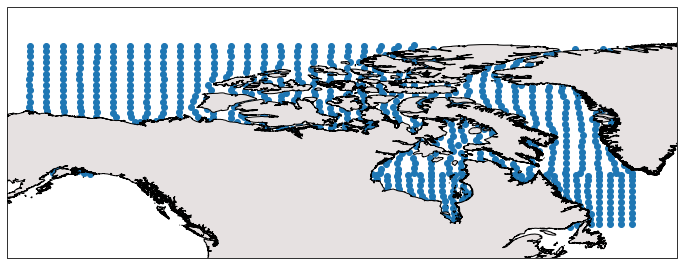

In [69]:
import cartopy.crs as ccrs
import cartopy.feature as cpf 
   
# marking the x-axis and y-axis 
fig=plt.figure(figsize=(12, 12), frameon=True)
ax=plt.axes(projection=ccrs.PlateCarree()) 
ax.set_extent([-160,-40,45,90]) 
# ax.set_extent([-180,180,45,90])  
feature=cpf.GSHHSFeature(scale='i',levels=[1],facecolor='#e6e1e1',alpha=1)
ax.add_feature(feature)

plt.scatter(nobs[:,0],nobs[:,1],transform=ccrs.PlateCarree())
plt.show()

In [ ]:
vec=np.hstack((nobs,nobsname.reshape(len(nobsname),1)))
print(vec.shape)
print(vec)
np.savetxt('AltimetryCanadaObs.xyn',vec,fmt='%s',delimiter="\t")

Reading the Altimetry data. 

In [4]:
altdata=xr.open_dataset('ModM2Arctic_altimetry.nc')
print(altdata.info())
lonsta=altdata.longitude.values
latsta=altdata.latitude.values
lonlatvec=np.vstack((lonsta,latsta)).T
staname=altdata.stations.values
M2amp=altdata.Ampl_mean.values
M2ph=altdata.Phase_mean.values
lonlatvec.shape

xarray.Dataset {
dimensions:
	stations = 2610 ;

variables:
	float32 latitude(stations) ;
		latitude:standard_name = latitude ;
		latitude:long_name = latitude ;
		latitude:units = degrees_north ;
	float32 longitude(stations) ;
		longitude:standard_name = longitude ;
		longitude:long_name = longitude ;
		longitude:units = degrees_east ;
	float32 Ampl_mean(stations) ;
		Ampl_mean:standard_name = Ampl_mean ;
		Ampl_mean:long_name = Yearly average amplitude of M2 tide ;
		Ampl_mean:units = m ;
	float32 Ampl_sept(stations) ;
		Ampl_sept:standard_name = Ampl_sept ;
		Ampl_sept:long_name = Monthly average amplitude of M2 tide; September ;
		Ampl_sept:units = m ;
	float32 Ampl_march(stations) ;
		Ampl_march:standard_name = Ampl_march ;
		Ampl_march:long_name = Monthly average amplitude of M2 tide; March ;
		Ampl_march:units = m ;
	float32 Ampl_modulation(stations) ;
		Ampl_modulation:standard_name = Ampl_modulation ;
		Ampl_modulation:long_name = Magnitude of seasonal modulation of M2 tide am

(2610, 2)

In [5]:
(svec,sM2amp)=snappingcanadagrid(lonlatvec,M2amp,lon0,lon1,lat0,lat1)
(svec,sM2ph)=snappingcanadagrid(lonlatvec,M2ph,lon0,lon1,lat0,lat1)
(svec,sM2ampmar)=snappingcanadagrid(lonlatvec,altdata.Ampl_march.values,lon0,lon1,lat0,lat1)
(svec,sM2phmar)=snappingcanadagrid(lonlatvec,altdata.Phase_march.values,lon0,lon1,lat0,lat1)
(svec,sM2ampsep)=snappingcanadagrid(lonlatvec,altdata.Ampl_sept.values,lon0,lon1,lat0,lat1)
(svec,sM2phsep)=snappingcanadagrid(lonlatvec,altdata.Phase_sept.values,lon0,lon1,lat0,lat1)
(svec,sM2ampmod)=snappingcanadagrid(lonlatvec,altdata.Ampl_modulation.values,lon0,lon1,lat0,lat1)
(svec,sM2phmod)=snappingcanadagrid(lonlatvec,altdata.Phase_modulation.values,lon0,lon1,lat0,lat1)

(683, 2)
(683,)
(683, 2)
(683,)
(683, 2)
(683,)
(683, 2)
(683,)
(683, 2)
(683,)
(683, 2)
(683,)
(683, 2)
(683,)
(683, 2)
(683,)


In [ ]:
##creating a nc file of this snapped data from inger's altimetry! 
ds=xr.Dataset({'Ampl':Amp,'Ph':Ph,'lon':Lon,'lat':Lat})
    ds.to_netcdf(name+'.nc')

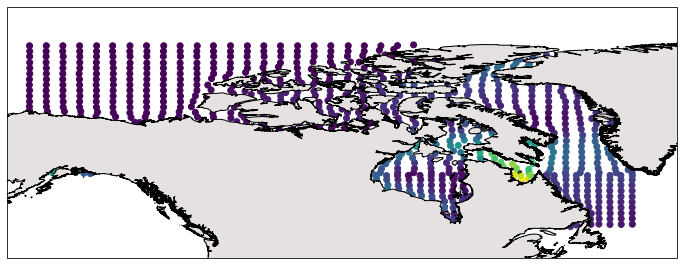

In [7]:
import cartopy.crs as ccrs
import cartopy.feature as cpf 
   
# marking the x-axis and y-axis 
fig=plt.figure(figsize=(12, 12), frameon=True)
ax=plt.axes(projection=ccrs.PlateCarree()) 
ax.set_extent([-160,-40,45,90]) 
# ax.set_extent([-180,180,45,90])  
feature=cpf.GSHHSFeature(scale='i',levels=[1],facecolor='#e6e1e1',alpha=1)
ax.add_feature(feature)

plt.scatter(svec[:,0],svec[:,1],c=sM2amp,transform=ccrs.PlateCarree())
plt.show()

Getting value of M2 at those points.

In [78]:
M2amp=altdata.Ampl_march.values
M2ampcan=np.where(vec==svec,M2amp)
print(M2ampcan.shape)

<ipython-input-78-0ab6c1a8523f>:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  M2ampcan=np.where(vec==svec,M2amp)


ValueError: either both or neither of x and y should be given

Snapping the points/stations from main file to the points in the altimetry. 

In [45]:
#This funcion snaps a vector say vec1 to locations in vec2. So for example in the case of Inger's altimetry data we had an issue 
# where altimetry didn't give good results at all the 2717 points. so she had results at 2610 points. This will help us get those 2610 points from 2717 points.

def snapstations(vec1,vec2,reltol):
    #vec2 one to compare to, one with lower number of values. 
    # vec1 the superset of vec2 # these are both nx2 arrays x2 are lon and lat respectively.
    delindex=[]
    xvec1=[];yvec1=[]
    for i in range(len(vec2[:,0])):
        x=vec2[i,0];y=vec2[i,1]
        commonx=np.isclose(vec1[:,0],x,rtol=reltol,atol=0.0 )
        commony=np.isclose(vec1[:,1],y,rtol=reltol,atol=0.0)
        trueindexx=np.where(commonx==True)
        trueindexy=np.where(commony==True)
        index=(np.intersect1d(trueindexx,trueindexy))
        if len(index)==0:
            delindex=np.append(delindex,i)
            print(delindex)
            continue
#         elif len(index)>1:
#             index=int(index[0])
#             print(index)
        else:
            index=int(index)
#             print(index)
#         print(vec1[index,0],vec1[index,1])
#         print(x,y)
        xvec1=np.append(xvec1,vec1[index,0])
        yvec1=np.append(yvec1,vec1[index,1])
        
    nvec1=np.vstack((xvec1,yvec1)).T
    
# 	    IMamp=np.append(IMamp,Mamp[index])
# 	    IMph=np.append(IMph,Mph[index])
# 	print(len(UMlon))
# 	Olon=np.delete(Olon,delindex.astype(int))
# 	Olat=np.delete(Olat,delindex.astype(int))
# 	Oamp=np.delete(Oamp,delindex.astype(int))
# 	Oph=np.delete(Oph,delindex.astype(int))
    return(nvec1)
        

In [67]:
nvec=snapstations(obs,vec,1e-3)
print(nvec.shape)

(2610, 2)


This mat file below contains all the data for 2730-13=2717 points. but only points flagged 0 are considered. 

In [7]:
import scipy.io
M2mat=scipy.io.loadmat('fullM2.mat')
print(M2mat)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sun Jul 19 17:07:54 2020', '__version__': '1.0', '__globals__': [], 'amp': array([[0.49812052, 0.51671016, 0.49994432, ...,        nan,        nan,
               nan]]), 'ampMarch': array([[0.49970516, 0.50962922, 0.47417213, ...,        nan,        nan,
               nan]]), 'ampSept': array([[0.47436379, 0.50072889, 0.50323509, ...,        nan,        nan,
               nan]]), 'flags': array([[0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'lat': array([[60.245341  , 60.99571735, 61.87063225, ..., 57.993104  ,
        58.996049  , 59.739369  ]]), 'locMax': array([[126. , 154.5, 206.5, ...,   nan,   nan,   nan]]), 'lon': array([[  0.7139164 ,   0.77508375,   0.84547595, ..., -46.0069345 ,
        -45.991874  , -46.062883  ]]), 'phase': array([[300.0412506 , 288.622763  , 283.60436463, ...,          nan,
                 nan,          nan]]), 'phaseMS': array([[0.48679695, 2.23820084, 0.03058868, ...,        nan,        n

This part of the code divides the canada grid in to different domains based on polygon and selects the altimetry points based on polygon in which it lies. 

In [4]:
#polygon points 
ptlatvec=np.array([67.0,60.0,70.0,84.0,83.0,72.0,68.0,68.0,57.0,50.0,50.0,57.0,50.0])
ptlonvec=np.array([-84.0,-112.0,-151.0,-151.0,-60.0,-82.0,-69.0,-45.0,-45.0,-45.0,-69.0,-72.0,-90.0])
#5 polygons
A=[(ptlonvec[0],ptlatvec[0]),(ptlonvec[11],ptlatvec[11]),(ptlonvec[10],ptlatvec[10]),(ptlonvec[12],ptlatvec[12]),(ptlonvec[1],ptlatvec[1])]
B=[(ptlonvec[0],ptlatvec[0]),(ptlonvec[1],ptlatvec[1]),(ptlonvec[2],ptlatvec[2]),(ptlonvec[3],ptlatvec[3]),(ptlonvec[4],ptlatvec[4]),(ptlonvec[5],ptlatvec[5])]
C=[(ptlonvec[4],ptlatvec[4]),(ptlonvec[5],ptlatvec[5]),(ptlonvec[6],ptlatvec[6]),(ptlonvec[7],ptlatvec[7])]
D=[(ptlonvec[0],ptlatvec[0]),(ptlonvec[5],ptlatvec[5]),(ptlonvec[6],ptlatvec[6]),(ptlonvec[7],ptlatvec[7]),(ptlonvec[8],ptlatvec[8]),(ptlonvec[11],ptlatvec[11])]
E=[(ptlonvec[8],ptlatvec[8]),(ptlonvec[9],ptlatvec[9]),(ptlonvec[10],ptlatvec[10]),(ptlonvec[11],ptlatvec[11])]

In [2]:
from shapely.geometry import Point, Polygon

# Point objects(Geo-coordinates)
p1 = Point(-126.0,76.0)
p2 = Point(-73,64)

# Polygon

polyvec = [Polygon(A),Polygon(B),Polygon(C),Polygon(D),Polygon(E)]
labels=['A','B','C','D','E']

NameError: name 'A' is not defined

In [18]:
print(p1.within(poly))
print(p2.within(poly))
print(poly.contains(p1))

True
False
True


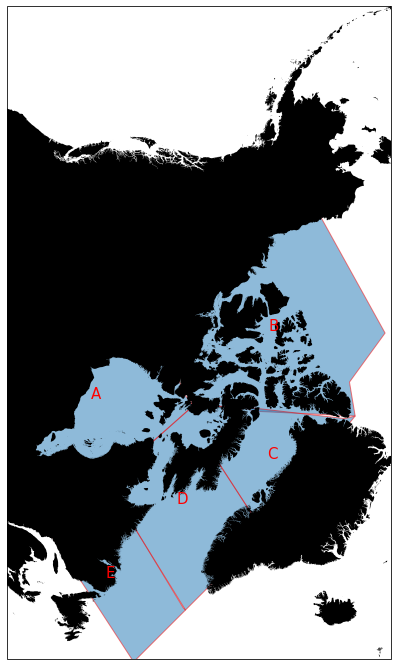

In [21]:
import cartopy.crs as ccrs
import cartopy.feature as cpf 
# marking the x-axis and y-axis 
fig=plt.figure(figsize=(12, 12), frameon=True)
ax=plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=0.0,true_scale_latitude=None, globe=None)) 
ax.set_extent((-158, -47, 49, 84), crs=ccrs.PlateCarree())
# ax.set_extent([-180,180,45,90])  
feature=cpf.GSHHSFeature(scale='i',levels=[1],facecolor='black',alpha=1,edgecolor='none')
for i in range(len(polyvec)):
    poly=polyvec[i]
    g=ax.add_geometries([poly], crs=ccrs.PlateCarree(), edgecolor='red', alpha=0.5)
    x = poly.centroid.x        
    y = poly.centroid.y
    ax.text(x, y, labels[i], color='red', size=15, ha='center', va='center', transform=ccrs.PlateCarree())
ax.add_feature(feature)

# plt.scatter(svec[:,0],svec[:,1],c=sM2amp,transform=ccrs.PlateCarree())
# add in the polygon

plt.show()



59.0358757132 -84.88911959576


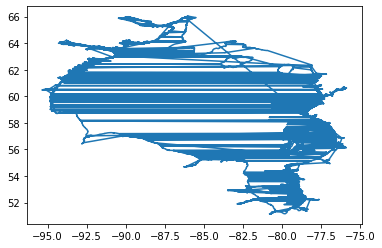

done


In [5]:
import shapefile as shp  # Requires the pyshp package
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
sf = shp.Reader("World_Seas_IHO_v3/World_Seas_IHO_v3.shp")

plt.figure()
for shape in sf.shapeRecords():
    if shape.record.NAME=='Hudson Bay':
        print(shape.record.Latitude,shape.record.Longitude)
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        poly=Polygon(shape.shape.points[:])
        # print(poly)
        plt.plot(x,y)
        plt.show()
print('done')

<AxesSubplot:>

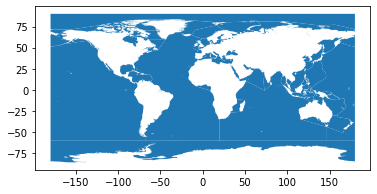

In [3]:
import geopandas as gpd
df=gpd.read_file("World_Seas_IHO_v3/World_Seas_IHO_v3.shp")
df.plot()

In [4]:
#seas in canada region based on the dataset.
Seasvec=['Hudson Bay','The Northwestern Passages','Hudson Strait','Baffin Bay','Davis Strait','Beaufort Sea','Labrador Sea','Arctic Ocean']

101


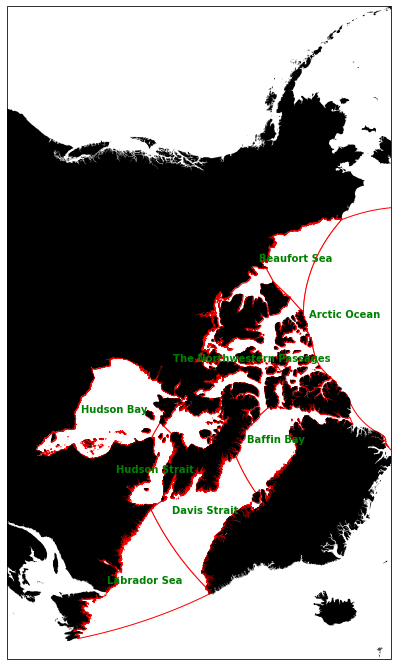

In [19]:
import cartopy.crs as ccrs
import cartopy.feature as cpf 
# marking the x-axis and y-axis 
fig=plt.figure(figsize=(12, 12), frameon=True)
ax=plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=0.0,true_scale_latitude=None, globe=None)) 
ax.set_extent((-158, -47, 49, 84), crs=ccrs.PlateCarree())
# ax.set_extent([-180,180,45,90])  
feature=cpf.GSHHSFeature(scale='i',levels=[1],facecolor='black',alpha=1,edgecolor='none')
npoly=len(df.NAME)
print(npoly)
for i in range(npoly):
    polyname=df.NAME[i]
    for sea in Seasvec:
        if polyname==sea:
            # print(df.Latitude[i],df.Longitude[i])
            poly=df.geometry[i]
            g=ax.add_geometries([poly], crs=ccrs.PlateCarree(), edgecolor='red', alpha=1,facecolor='white')
            if polyname=='Arctic Ocean':
                x = poly.centroid.x-130.0       
                y = poly.centroid.y-4.0
            else:
                x = poly.centroid.x        
                y = poly.centroid.y
            ax.text(x, y, polyname, color='green',fontweight='bold', size=10, ha='center', va='center', transform=ccrs.PlateCarree())

ax.add_feature(feature)
# print(x,y)
plt.savefig('Canadmodel_regions.jpg',dpi=500)
plt.show()


In [14]:
x1=poly.centroid.x
y1=poly.centroid.y
print(x1,y1)

-5.202583462945719 83.9166305845443


In [20]:
# checking if the tide gauge and altimetry  lies in a particular polygon! 
obs=np.loadtxt('Altimetry_canada.xyn',usecols=(0,1),dtype='float')
# print(obs[:,:]) #13 is the tide gauges not the altimetry product. 
print(obs.shape)
obsname=np.loadtxt('Altimetry_canada.xyn',usecols=(2),dtype=object)

#reading with pandas.  for TG
import pandas as pd
fd=np.array(pd.read_csv('CHSTG_snapped_model_obs.xyn',sep="  ",header=None))
obsTG=fd[:,:2]
# print(obsTG[:,:]) #13 is the tide gauges not the altimetry product. 
print(obsTG.shape)
obsnameTG=fd[:,2]

(743, 2)
(154, 2)


<ipython-input-20-bfaa86a8f8b8>:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  fd=np.array(pd.read_csv('CHSTG_snapped_model_obs.xyn',sep="  ",header=None))


The below part deals with TG data.

In [199]:
npoly=len(df.NAME)
print(npoly)
arcseavec=['Arctic Ocean','Lincoln Sea']
for i in range(npoly):
    polyname=df.NAME[i]
    for sea in arcseavec:
        if polyname==sea:
            print(df.Latitude[i],df.Longitude[i])
            poly=df.geometry[i]
            lon=[];lat=[];name=[]
            poly1=poly.buffer(0.2)
            for i in range(len(obsTG[:,0])):
                point=Point(obsTG[i,0],obsTG[i,1])
                contains=poly1.intersects(point)
                if contains==True:
                    lon=np.append(lon,obsTG[i,0])
                    lat=np.append(lat,obsTG[i,1])
                    name=np.append(name,obsnameTG[i])
            vec=np.vstack((lon,lat,name))
            np.savetxt(sea+'_TG.xyn',vec.T,fmt='%s',delimiter="\t")


101
82.83077860791 -53.19784428158
84.8648860275 -5.20258346295


In [27]:
#comparing two files for same tide gauges or points.
# def comparepoints(file1,file2):  #file1 and file2 are two xyn files.

#check for isempty

def comparepoints(file1,file2):
    def getindices(fname,indices):
        indval=np.array([np.size(indices[x]) for x in range(len(indices))])

        if np.all((indval==0)):
            print("No same point found")
        else:
            #finding the indices of where matching elements are found
            findone=np.where(indval==1)
            print("The names of common points are:")
            # print(np.array(indices)[findone])
            print(fname[findone])


    f1name=np.array(pd.read_csv(file1,sep="\t",header=None))[:,2]
    f2name=np.array(pd.read_csv(file2,sep="\t",header=None))[:,2]
    len1=len(f1name);len2=len(f2name)
    print(len1,len2)
    if len1>len2:
        indices=[np.where(f2name==x)[0] for x in f1name]
        print(file1+' has more obs points than '+file2)
        getindices(f1name,indices)
    else:
        indices=[np.where(f1name==x)[0] for x in f2name]
        print(file2+' has more obs points than '+file1)
        getindices(f2name,indices)



In [208]:
%%capture cap --no-stderr
#comparing common points in all seas. 
for sea1 in Seasvec:
    file1=sea1+'_TG.xyn'
    for sea2 in Seasvec:
        if sea1!=sea2:
            file2=sea2+'_TG.xyn'
            comparepoints(file1,file2)
            

with open('output.txt', 'w') as f:
    f.write(cap.stdout)

f.close()

101
72.13923071101 -136.82924749189
55.87120192359 -53.47754799213
61.87021735795 -71.45006823165
64.71774818317 -58.17611330843
74.506107604 -67.12170640601
59.0358757132 -84.88911959576
72.6074820731 -98.52384039804


No handles with labels found to put in legend.


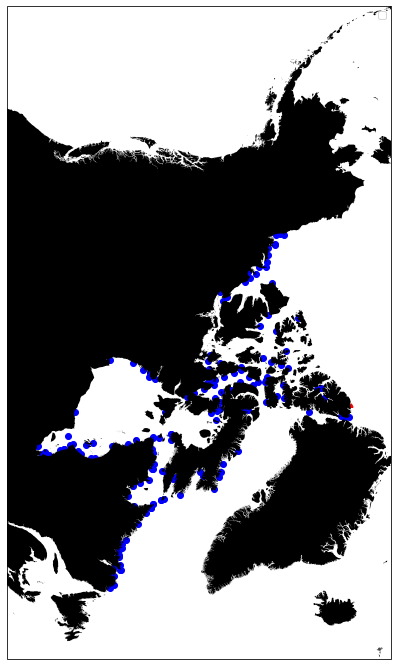

In [182]:
Seascompvec=['Davis Strait', 'Labrador Sea']
import cartopy.crs as ccrs
import cartopy.feature as cpf 
# marking the x-axis and y-axis 
fig=plt.figure(figsize=(12, 12), frameon=True)
ax=plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=0.0,true_scale_latitude=None, globe=None)) 
ax.set_extent((-158, -47, 49, 84), crs=ccrs.PlateCarree())
# ax.set_extent([-180,180,45,90])  
feature=cpf.GSHHSFeature(scale='i',levels=[1],facecolor='black',alpha=1,edgecolor='none')
plt.scatter(obsTG[:,0],obsTG[:,1],transform=ccrs.PlateCarree(),color='red',marker='^',s=10)
npoly=len(df.NAME)
print(npoly)
for i in range(npoly):
    polyname=df.NAME[i]
    for sea in Seasvec:
        if polyname==sea:
            print(df.Latitude[i],df.Longitude[i])
            poly=df.geometry[i]
            lon=[];lat=[];name=[]
            poly1=poly.buffer(0.2)
            for i in range(len(obsTG[:,0])):
                point=Point(obsTG[i,0],obsTG[i,1])
                contains=poly1.intersects(point)
                if contains==True:
                    lon=np.append(lon,obsTG[i,0])
                    lat=np.append(lat,obsTG[i,1])
                    name=np.append(name,obsnameTG[i])
            # vec=np.vstack((lon,lat,name))
            # np.savetxt(sea+'_TG.xyn',vec.T,fmt='%s',delimiter="\t")
            # g=ax.add_geometries([poly1], crs=ccrs.PlateCarree(), edgecolor='red', alpha=0.5,label=sea)
            plt.scatter(lon,lat,transform=ccrs.PlateCarree(),color='blue')

plt.legend()
ax.add_feature(feature)
# print(x,y)


# add in the polygon

plt.show()

Now we deal with Altimetry data in the same way. 

In [38]:
#seas in canada region based on the dataset.
Seasvec=['Hudson Bay','The Northwestern Passages','Hudson Strait','Baffin Bay','Davis Strait','Beaufort Sea','Labrador Sea','Arctic Ocean']
print(Seasvec)

['Hudson Bay', 'The Northwestern Passages', 'Hudson Strait', 'Baffin Bay', 'Davis Strait', 'Beaufort Sea', 'Labrador Sea', 'Arctic Ocean']


In [33]:
#creating the .xyn files for each of the 6 regions.
npoly=len(df.NAME)
print(npoly)
for i in range(npoly):
    polyname=df.NAME[i]
    for sea in Seasvec:
        if polyname==sea:
            print(df.Latitude[i],df.Longitude[i])
            poly=df.geometry[i]
            lon=[];lat=[];name=[]
            poly1=poly.buffer(0.2)
            for i in range(len(obs[:,0])):
                point=Point(obs[i,0],obs[i,1])
                contains=poly1.intersects(point)
                if contains==True:
                    lon=np.append(lon,obs[i,0])
                    lat=np.append(lat,obs[i,1])
                    name=np.append(name,obsname[i])
            vec=np.vstack((lon,lat,name))
            np.savetxt(sea+'_Altimetry.xyn',vec.T,fmt='%s',delimiter="\t")


101
72.13923071101 -136.82924749189
55.87120192359 -53.47754799213
61.87021735795 -71.45006823165
64.71774818317 -58.17611330843
74.506107604 -67.12170640601
82.83077860791 -53.19784428158
59.0358757132 -84.88911959576
72.6074820731 -98.52384039804
84.8648860275 -5.20258346295


In [40]:
%%capture cap --no-stderr
#comparing common points in all seas. 
for sea1 in Seasvec:
    file1=sea1+'_Altimetry.xyn'
    for sea2 in Seasvec:
        if sea1!=sea2:
            file2=sea2+'_Altimetry.xyn'
            comparepoints(file1,file2)
            

with open('output.txt', 'w') as f:
    f.write(cap.stdout)

f.close()

101
72.13923071101 -136.82924749189
55.87120192359 -53.47754799213
61.87021735795 -71.45006823165
64.71774818317 -58.17611330843
74.506107604 -67.12170640601
82.83077860791 -53.19784428158
59.0358757132 -84.88911959576
72.6074820731 -98.52384039804
84.8648860275 -5.20258346295


No handles with labels found to put in legend.


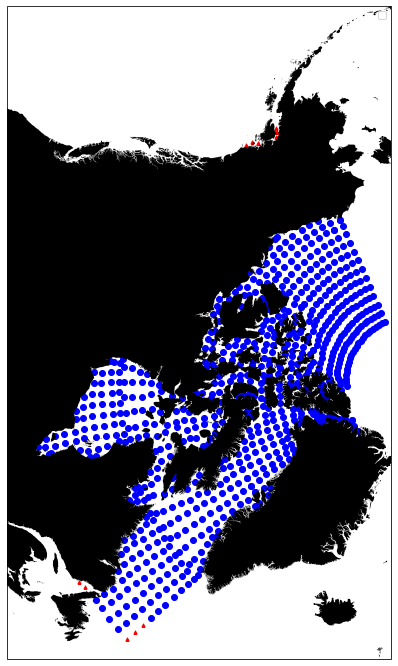

In [36]:
Seascompvec=['Davis Strait', 'Labrador Sea']
import cartopy.crs as ccrs
import cartopy.feature as cpf 
# marking the x-axis and y-axis 
fig=plt.figure(figsize=(12, 12), frameon=True)
ax=plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=0.0,true_scale_latitude=None, globe=None)) 
ax.set_extent((-158, -47, 49, 84), crs=ccrs.PlateCarree())
# ax.set_extent([-180,180,45,90])  
feature=cpf.GSHHSFeature(scale='i',levels=[1],facecolor='black',alpha=1,edgecolor='none')
plt.scatter(obs[:,0],obs[:,1],transform=ccrs.PlateCarree(),color='red',marker='^',s=10)
npoly=len(df.NAME)
print(npoly)
for i in range(npoly):
    polyname=df.NAME[i]
    for sea in Seasvec:
        if polyname==sea:
            print(df.Latitude[i],df.Longitude[i])
            poly=df.geometry[i]
            lon=[];lat=[];name=[]
            poly1=poly.buffer(0.2)
            for i in range(len(obs[:,0])):
                point=Point(obs[i,0],obs[i,1])
                contains=poly1.intersects(point)
                if contains==True:
                    lon=np.append(lon,obs[i,0])
                    lat=np.append(lat,obs[i,1])
                    name=np.append(name,obsname[i])
            # vec=np.vstack((lon,lat,name))
            # np.savetxt(sea+'_TG.xyn',vec.T,fmt='%s',delimiter="\t")
            # g=ax.add_geometries([poly1], crs=ccrs.PlateCarree(), edgecolor='red', alpha=0.5,label=sea)
            plt.scatter(lon,lat,transform=ccrs.PlateCarree(),color='blue')

plt.legend()
ax.add_feature(feature)

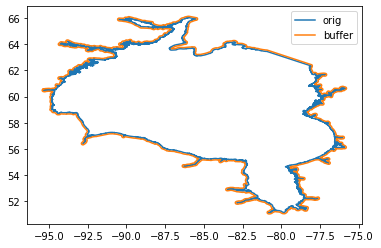

In [29]:
ax1=plt.axes()
x1,y1=poly1.exterior.xy
x,y=poly.exterior.xy
ax1.plot(x,y,label='orig')
ax1.plot(x1,y1,label='buffer')
ax1.legend()